### New York Taxi Fare

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-white')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Data Preprocessing

In [2]:
taxi=pd.read_csv(r'/home/pandit/DataScience/CodingNest/Projects/Regression/New York/train.csv', nrows=4_000_00, parse_dates=["pickup_datetime"]).drop(columns='key')
print("The dataset is {} taxi rides".format(len(taxi)))

The dataset is 400000 taxi rides


In [4]:
taxi.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.500,2009-06-15 17:26:21+00:00,-73.844,40.721,-73.842,40.712,1
1,16.900,2010-01-05 16:52:16+00:00,-74.016,40.711,-73.979,40.782,1
2,5.700,2011-08-18 00:35:00+00:00,-73.983,40.761,-73.991,40.751,2
3,7.700,2012-04-21 04:30:42+00:00,-73.987,40.733,-73.992,40.758,1
4,5.300,2010-03-09 07:51:00+00:00,-73.968,40.768,-73.957,40.784,1


In [5]:
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,400000.000,400000.000,400000.000,399997.000,399997.000,400000.000
mean,11.363,-72.513,39.920,-72.512,39.919,1.683
std,9.945,11.241,8.357,10.835,6.499,1.308
min,-44.900,-740.000,-3116.285,-1329.621,-1189.615,0.000
25%,6.000,-73.992,40.735,-73.991,40.734,1.000
50%,8.500,-73.982,40.753,-73.980,40.753,1.000
75%,12.500,-73.967,40.767,-73.964,40.768,2.000
max,500.000,2140.601,1703.093,40.851,404.617,6.000



Find something funny?

1). Min fare amount is negative.

2). Min and Max longitude and latitude look unreal.

3). Min passenger count is 0.

We are fixing them now.

1). New York city longitudes are around -74 and latitudes are around 41.

2). Remove 0 passenger count.

3). The initial charge is $2.5, so we are removing fare amount smaller than this amount.

In [6]:
taxi = taxi[((taxi['pickup_longitude'] > -78) & (taxi['pickup_longitude'] < -70)) & 
            ((taxi['dropoff_longitude'] > -78) & (taxi['dropoff_longitude'] < -70)) & 
            ((taxi['pickup_latitude'] > 37) & (taxi['pickup_latitude'] < 45)) & 
            ((taxi['dropoff_latitude'] > 37) & (taxi['dropoff_latitude'] < 45)) & 
            (taxi['passenger_count'] > 0) & (taxi['fare_amount'] >= 2.5)]

In [7]:
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,390345.000,390345.000,390345.000,390345.000,390345.000,390345.000
mean,11.358,-73.975,40.751,-73.974,40.751,1.690
std,9.887,0.044,0.034,0.043,0.036,1.306
min,2.500,-77.117,37.420,-77.043,37.347,1.000
25%,6.000,-73.992,40.737,-73.992,40.736,1.000
50%,8.500,-73.982,40.753,-73.981,40.754,1.000
75%,12.500,-73.968,40.768,-73.965,40.768,2.000
max,500.000,-70.141,43.183,-70.050,43.415,6.000


In [8]:
taxi.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

#### EDA

Lets try to visualize ten taxi rides.

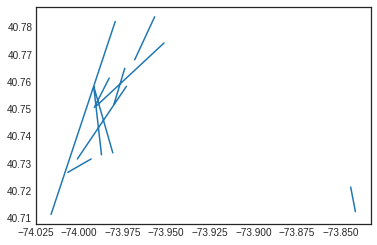

In [9]:
import seaborn as sns
def showrides(df, numlines):
  lats = []
  lons = []
  goodrows = df[df['pickup_longitude'] < -70]
  for iter, row in goodrows[:numlines].iterrows():
    lons.append(row['pickup_longitude'])
    lons.append(row['dropoff_longitude'])
    lons.append(None)
    lats.append(row['pickup_latitude'])
    lats.append(row['dropoff_latitude'])
    lats.append(None)

  plt.plot(lons, lats)

showrides(taxi, 10)

some ride distances are very short, some are pretty long.

#### Fare amount

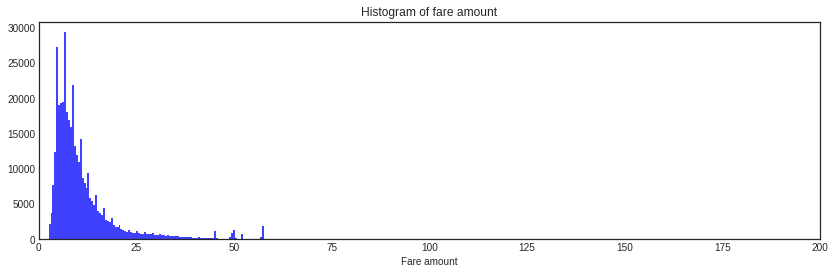

In [10]:
plt.figure(figsize = (14, 4))
n, bins, patches = plt.hist(taxi.fare_amount, 1000, facecolor='blue', alpha=0.75)
plt.xlabel('Fare amount')
plt.title('Histogram of fare amount')
plt.xlim(0, 200)
plt.show();

The histogram of fare amount shows that most fare amount are small

In [11]:
taxi.groupby('fare_amount').size().nlargest(10)

fare_amount
6.500     18926
4.500     16024
8.500     14741
5.300     11429
5.700     11243
4.900     11138
6.100     10961
6.900     10223
10.500     9784
7.300      9710
dtype: int64

Interesting,the most common fare amount are very small at only 6.5 and 4.5

#### Passenger count

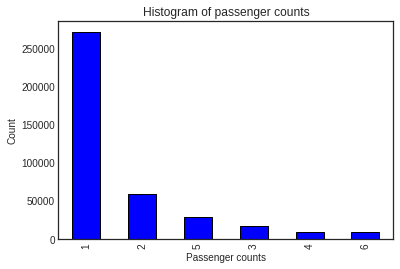

In [12]:
taxi['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Histogram of passenger counts'); plt.xlabel('Passenger counts'); plt.ylabel('Count');

In [13]:
taxi.groupby('passenger_count').size()

passenger_count
1    271081
2     57878
3     17058
4      8291
5     27774
6      8263
dtype: int64

Based on the above discovery, we are going to remove taxi rides with passenger_count > 6.



In [14]:
taxi=taxi.loc[taxi['passenger_count']<=6]

In [15]:
taxi.groupby('passenger_count').size()

passenger_count
1    271081
2     57878
3     17058
4      8291
5     27774
6      8263
dtype: int64

In [16]:
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,390345.000,390345.000,390345.000,390345.000,390345.000,390345.000
mean,11.358,-73.975,40.751,-73.974,40.751,1.690
std,9.887,0.044,0.034,0.043,0.036,1.306
min,2.500,-77.117,37.420,-77.043,37.347,1.000
25%,6.000,-73.992,40.737,-73.992,40.736,1.000
50%,8.500,-73.982,40.753,-73.981,40.754,1.000
75%,12.500,-73.968,40.768,-73.965,40.768,2.000
max,500.000,-70.141,43.183,-70.050,43.415,6.000


To be quick, let's create a baseline model, without Machine learning, just a simple rate calculation

In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(taxi, test_size=0.3, random_state=42)

In [18]:
import numpy as np
import shutil

def distance_between(lat1, lon1, lat2, lon2):
  # Haversine formula to compute distance 
  dist = np.degrees(np.arccos(np.sin(np.radians(lat1)) * np.sin(np.radians(lat2)) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.cos(np.radians(lon2 - lon1)))) * 60 * 1.515 * 1.609344
  return dist

def estimate_distance(df):
  return distance_between(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

def compute_rmse(actual, predicted):
  return np.sqrt(np.mean((actual - predicted)**2))

def print_rmse(df, rate, name):
  print("{1} RMSE = {0}".format(compute_rmse(df['fare_amount'], rate * estimate_distance(df)), name))

In [19]:
rate = train['fare_amount'].mean() / estimate_distance(train).mean()

print("Rate = ${0}/km".format(rate))
print_rmse(train, rate, 'Train')
print_rmse(test, rate, 'Test')

Rate = $2.5682893540515486/km
Train RMSE = 9.802475266662757
Test RMSE = 9.042693897196058


/home/pandit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  


This baseline model gets us RMSE for test set at $9.91. We expect ML achieve better than this.

Feature engineering
1). Extract information from datetime (day of week, month, hour, day). Taxi fares change day/night or on weekdays/holidays.

2). The distance from pickup to dropoff. The longer the trip, the higher the price.

3). Add columns indicating distance from pickup or dropoff coordinates to JFK. Trips from/to JFK have a flat fare at $52.

Getting distance between two points based on latitude and longitude using haversine formula. https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas/29546836#29546836

In [20]:
taxi['year'] = taxi.pickup_datetime.dt.year
taxi['month'] = taxi.pickup_datetime.dt.month
taxi['day'] = taxi.pickup_datetime.dt.day
taxi['weekday'] = taxi.pickup_datetime.dt.weekday
taxi['hour'] = taxi.pickup_datetime.dt.hour

In [21]:
taxi.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
0,4.500,2009-06-15 17:26:21+00:00,-73.844,40.721,-73.842,40.712,1,2009,6,15,0,17
1,16.900,2010-01-05 16:52:16+00:00,-74.016,40.711,-73.979,40.782,1,2010,1,5,1,16
2,5.700,2011-08-18 00:35:00+00:00,-73.983,40.761,-73.991,40.751,2,2011,8,18,3,0
3,7.700,2012-04-21 04:30:42+00:00,-73.987,40.733,-73.992,40.758,1,2012,4,21,5,4
4,5.300,2010-03-09 07:51:00+00:00,-73.968,40.768,-73.957,40.784,1,2010,3,9,1,7


In [22]:
from math import radians, cos, sin, asin, sqrt
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # 6371 is Radius of earth in kilometers. Use 3956 for miles
    return km

taxi['distance'] = haversine_np(taxi['pickup_latitude'], taxi['pickup_longitude'], taxi['dropoff_latitude'] , taxi['dropoff_longitude'])

In [23]:
taxi.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
0,4.500,2009-06-15 17:26:21+00:00,-73.844,40.721,-73.842,40.712,1,2009,6,15,0,17,0.410
1,16.900,2010-01-05 16:52:16+00:00,-74.016,40.711,-73.979,40.782,1,2010,1,5,1,16,4.629
2,5.700,2011-08-18 00:35:00+00:00,-73.983,40.761,-73.991,40.751,2,2011,8,18,3,0,1.001
3,7.700,2012-04-21 04:30:42+00:00,-73.987,40.733,-73.992,40.758,1,2012,4,21,5,4,0.910
4,5.300,2010-03-09 07:51:00+00:00,-73.968,40.768,-73.957,40.784,1,2010,3,9,1,7,1.361


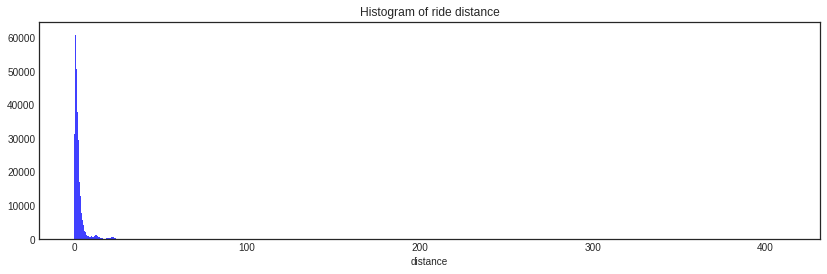

In [24]:
plt.figure(figsize = (14, 4))
n, bins, patches = plt.hist(taxi.distance, 1000, facecolor='blue', alpha=0.75)
plt.xlabel('distance')
plt.title('Histogram of ride distance')
plt.show();

In [25]:
taxi['distance'].describe()

count   390345.000
mean         2.731
std          4.216
min          0.000
25%          0.856
50%          1.558
75%          2.840
max        410.896
Name: distance, dtype: float64

In [26]:
taxi=taxi.loc[taxi['distance']>0]

Official NYC yellow taxis have a flat rate fee from JFK to Manhattan for $52 (plus tolls and tip), Add columns indicating distance from pickup or dropoff coordinates to JFK.

In [27]:
JFK_coord = (40.6413, -73.7781)

pickup_JFK = haversine_np(taxi['pickup_latitude'], taxi['pickup_longitude'], JFK_coord[0], JFK_coord[1]) 
dropoff_JFK = haversine_np(JFK_coord[0], JFK_coord[1], taxi['dropoff_latitude'], taxi['dropoff_longitude'])

In [28]:
taxi['JFK_distance'] = pd.concat([pickup_JFK, dropoff_JFK], axis=1).min(axis=1)


In [29]:
taxi['JFK_distance'].describe()

count   386146.000
mean        20.989
std          4.640
min          0.077
25%         20.270
50%         22.056
75%         23.145
max        391.573
Name: JFK_distance, dtype: float64

In [30]:
taxi.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance,JFK_distance
0,4.500,2009-06-15 17:26:21+00:00,-73.844,40.721,-73.842,40.712,1,2009,6,15,0,17,0.410,7.397
1,16.900,2010-01-05 16:52:16+00:00,-74.016,40.711,-73.979,40.782,1,2010,1,5,1,16,4.629,22.787
2,5.700,2011-08-18 00:35:00+00:00,-73.983,40.761,-73.991,40.751,2,2011,8,18,3,0,1.001,23.054
3,7.700,2012-04-21 04:30:42+00:00,-73.987,40.733,-73.992,40.758,1,2012,4,21,5,4,0.910,23.415
4,5.300,2010-03-09 07:51:00+00:00,-73.968,40.768,-73.957,40.784,1,2010,3,9,1,7,1.361,20.336


In [31]:
del taxi['pickup_datetime']

In [39]:
# define dataset
# select points 15 miles near NYC center and remove zero passenger datapoints
idx = (taxi["JFK_distance"] < 15) & (taxi["passenger_count"] != 0)

features = ['year','month','day','weekday','hour']

X = taxi[idx][features].values
y = taxi[idx]['fare_amount'].values

In [40]:
from sklearn.model_selection import train_test_split
y = taxi['fare_amount']
X = taxi.drop(columns=['fare_amount'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))

model_lin.fit(X_train, y_train)

y_train_pred = model_lin.predict(X_train)

/home/pandit/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pandit/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/pandit/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [48]:
from sklearn.metrics import mean_squared_error

print("Test RMSE: %.3f" % mean_squared_error(y_test, y_pred) ** 0.5)

Test RMSE: 6.048


In [49]:
# define dataset
XTEST = taxi[features].values